In [ ]:
import numpy as np
import pandas as np
from pandas import read_csv
import matplotlib as plt
import seaborn as sns

: 

In [6]:
data=(read_csv("haberman.data"))
print(data.head(10))

   Age  Year  Aux  Survival
0   30    64    1         1
1   30    62    3         1
2   30    65    0         1
3   31    59    2         1
4   31    65    4         1
5   33    58   10         1
6   33    60    0         1
7   34    59    0         2
8   34    66    9         2
9   34    58   30         1


In [7]:
for columns in data.columns:
    print(f"{data[columns].std()}")

10.80345234930328
3.249404663223851
7.189653506248565
0.44189911885403554


In [8]:
data[data.columns].std()

Age         10.803452
Year         3.249405
Aux          7.189654
Survival     0.441899
dtype: float64

In [9]:
data.describe()

,Age,Year,Aux,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


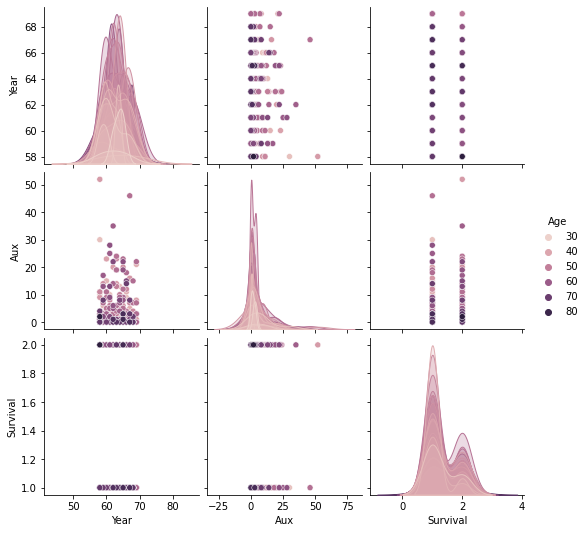

In [10]:
sns.pairplot(data,hue="Age")

In [13]:
# calculate summary statistics
data_mean, data_std = data.mean(), data.std()


In [17]:
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower,upper)

Age         20.047159
Year        53.104727
Aux        -17.542817
Survival    -0.060991
dtype: float64 Age         84.867873
Year        72.601155
Aux         25.595104
Survival     2.590403
dtype: float64


In [16]:
# identify outliers    for 1 columns
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

TypeError: Invalid comparison between dtype=float64 and str

In [23]:
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
#usage for variable "chol"
upper_limit, lower_limit = outlier_removal(data, "Aux")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)
#now display "outliers table for this variable"


data[(data['Aux'] < lower_limit) | (data['Aux'] > upper_limit)]

Upper limit:  25.595104309595367
Lower Limit:  -17.54281672789602


,Age,Year,Aux,Survival
9,34,58,30,1
62,43,58,52,2
174,54,67,46,1
215,59,62,35,2
252,63,61,28,1


In [35]:
result=0
l=[]
for columns in data.columns:
    upper_limit, lower_limit = outlier_removal(data, columns)
    result += len(data[(data[columns] < lower_limit) | (data[columns] > upper_limit)])
    lol=data[(data[columns] < lower_limit) | (data[columns] > upper_limit)]
    if not lol.empty:
        l.append(lol.index)
print(result)
for i in l:
    print(i)


5
Int64Index([9, 62, 174, 215, 252], dtype='int64')
